<a href="https://colab.research.google.com/github/nandakishore2696/Hugging_Face_Projects/blob/main/Object_Dectection_facebook_detr_resnet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/401 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

In [ ]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
display(image)

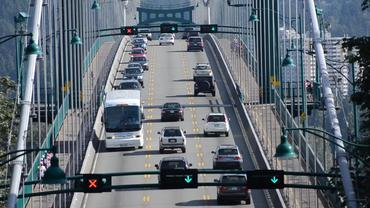

In [21]:
image = Image.open("/content/task.jpg")
display(image)

In [22]:
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

In [23]:
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )


Detected car with confidence 0.952 at location [158.5, 33.29, 174.25, 45.31]
Detected traffic light with confidence 0.979 at location [78.8, 175.74, 112.51, 191.76]
Detected car with confidence 0.969 at location [159.21, 126.11, 185.83, 152.7]
Detected traffic light with confidence 0.989 at location [122.15, 26.45, 134.72, 34.06]
Detected car with confidence 0.996 at location [212.28, 144.05, 242.44, 168.93]
Detected car with confidence 0.955 at location [193.48, 67.69, 216.15, 95.65]
Detected truck with confidence 0.908 at location [158.93, 125.8, 186.45, 152.72]
Detected car with confidence 0.981 at location [114.43, 79.1, 140.93, 92.45]
Detected car with confidence 0.945 at location [126.02, 61.88, 146.09, 75.5]
Detected car with confidence 0.908 at location [129.76, 56.65, 147.85, 72.19]
Detected car with confidence 0.983 at location [160.98, 101.61, 184.38, 122.28]
Detected bus with confidence 0.958 at location [93.77, 65.52, 142.72, 151.16]
Detected car with confidence 0.928 at l